In [17]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [18]:
input_nodes = 40
units = 64
output_nodes = 1

In [19]:
def initialize_params(input_nodes, units, output_nodes):

    def normal(shape):
        return np.random.normal(0, 1, size = shape)

    def matrix():
        return (normal((input_nodes, units)), normal((units, units)), torch.zeros(units))

    w_xz, w_hz, b_z = matrix()
    w_xr, w_hr, b_r = matrix()
    w_xh, w_hh, b_h = matrix()

    #output parameters
    w_hq = normal((units, output_nodes))
    b_q = torch.zeros(output_nodes, )
    
    return [w_xz, w_hz, b_z, w_xr, w_hr, b_r, w_xh, w_hh, b_h, w_hq, b_q]

In [27]:
def gru(inputs, params):
    w_xz, w_hz, b_z, w_xr, w_hr, b_r, w_xh, w_hh, b_h, w_hq, b_q = params 
    H = np.random.normal(0, 1, size =(input_nodes, units))

    outputs = []
    for X in inputs: 
        Z = torch.sigmoid((X @ w_xz)+(H @ w_hz)+b_z)
        R = torch.sigmoid((X @ w_xr)+(H @ w_hr)+b_r)
        H_tilda = torch.tanh((X @ w_xh)+((R * H) @ w_hh)+b_h)
        H = Z * H + (1 - Z) * H_tilda
        Y = H @ w_hq + b_q

    return H

In [21]:
def conver_to_dataset(signal, step):
  X = []
  Y = []
  for i in range(len(signal) - step):
    j = i + step
    X.append(signal[i:j])
    Y.append(signal[j])
  return np.array(X), np.array(Y)

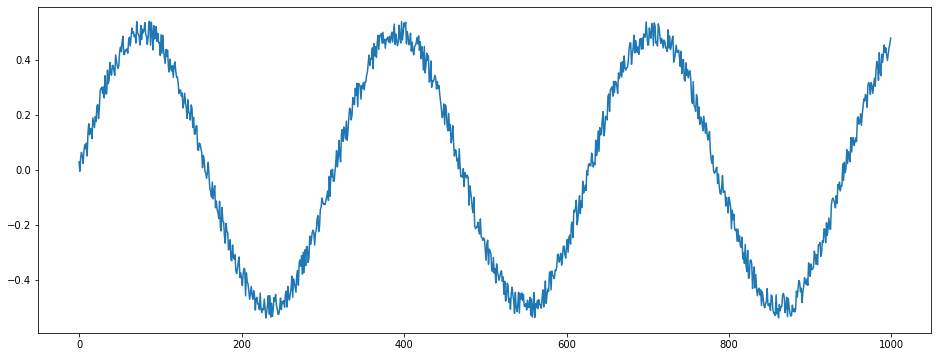

In [26]:
N = 1000 
t = np.arange(0, N)
data_sine = np.sin(0.02 * t)/2 + np.random.uniform(-0.05, 0.05, N)
plt.figure(figsize=(16, 6))
plt.plot(data_sine)

In [28]:
X_sine, Y_sine = conver_to_dataset(data_sine, 40)

In [29]:
params = initialize_params(input_nodes, units, output_nodes)
gru_output = gru(X_sine, params)

TypeError: ignored